In [50]:
import pandas as pd

In [52]:
legitimate_urls = pd.read_csv("./extracted_csv_files/legitimate-urls.csv")
phishing_urls = pd.read_csv("./extracted_csv_files/phishing-urls.csv")

In [54]:
legitimate_urls.head(10)
phishing_urls.head(10)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,1,0,1,1
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,1,0,1
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,1,0,0,1
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,1,0,1
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,1,0,0,1
5,dj00.co.vu,1,0,/css/,0,http,0,0,2,1,1,1,0,1,1,0,0
6,133.130.103.10,0,1,/21/logar/,0,http,0,2,0,1,0,1,0,1,0,0,1
7,httpssicredi.esy.es,0,0,/servico/sicredi/validarclientes/mobi/index.php,0,http,0,2,2,1,1,1,1,1,1,0,1
8,gamesaty.ga,0,0,/wp-content///yh/en/,0,http,1,0,2,1,0,1,0,1,0,0,1
9,luxuryupgradepro.com,0,0,/ymailNew/ymailNew/,0,http,0,0,0,0,0,1,0,1,0,0,1


In [56]:
urls = legitimate_urls.append(phishing_urls)

In [58]:
urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [60]:
urls.shape[1]

14

In [62]:
urls.columns

Index(['Having_@_symbol', 'Having_IP', 'Prefix_suffix_separation',
       'Redirection_//_symbol', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

In [64]:
urls = urls.drop(urls.columns[[0,3,5]],axis=1)

In [66]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [68]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']

In [70]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [72]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1410 605 1410 605


In [74]:
labels_train.value_counts()

0    719
1    691
Name: label, dtype: int64

In [76]:
labels_test.value_counts()

1    307
0    298
Name: label, dtype: int64

In [78]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [80]:
random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
prediction_label = random_forest_classifier.predict(data_test)

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
cpnfusionMatrix = confusion_matrix(labels_test,prediction_label)
print(cpnfusionMatrix)
accuracy_score(labels_test,prediction_label)

[[247  51]
 [ 95 212]]


0.7586776859504132

In [86]:
custom_random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=10000)

In [88]:
custom_random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=10000, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
custom_classifier_prediction_label = custom_random_forest_classifier.predict(data_test)

In [91]:
confusionMatrix2 = confusion_matrix(labels_test,custom_classifier_prediction_label)
print(confusionMatrix2)
accuracy_score(labels_test,custom_classifier_prediction_label)

[[251  47]
 [ 95 212]]


0.7652892561983471

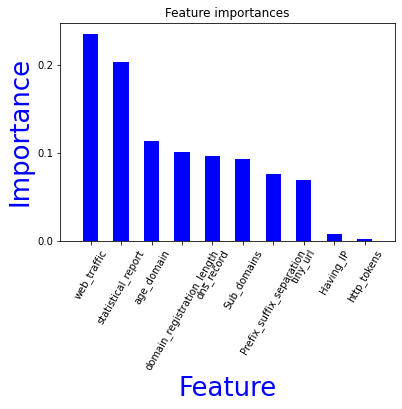

In [93]:
import matplotlib.pyplot as plt
import numpy as np

importances = custom_random_forest_classifier.feature_importances_
indices = np.argsort(importances)[::-1] 
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],width=0.5, color="b", align="center")   
plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
plt.xlim([-1, data_train.shape[1]])
plt.rcParams['figure.figsize'] = (40,15)
plt.xticks(rotation= 60)
plt.rcParams.update({'font.size': 22})
plt.xlabel("Feature", fontsize=26, color="blue")
plt.ylabel("Importance", fontsize=26, color="blue")
plt.show()